In [133]:
import os 
import pandas as pd
import numpy as np
imdb_dir = '/home/jovyan/work'
data_ori = pd.read_csv("/home/jovyan/work/imdb-data/data.csv") 
texts_origin = data_ori.to_numpy()

labels = []
texts = []

texts = texts_origin[:,0]
labels_string = texts_origin[:,1]

for val in labels_string:
    if val == 'negative':
        labels.append(0)
    else:
        labels.append(1)

In [134]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing import sequence
import numpy as np 
maxlen = 100 
training_samples = 200 
validation_samples = 10000 
max_words = 10000 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) 
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index)) 
data = sequence.pad_sequences(sequences, maxlen=maxlen) 
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape) 
# indices = np.arange(data.shape[0]) 
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples] 
y_val = labels[training_samples: training_samples + validation_samples]

Found 124252 unique tokens.
Shape of data tensor: (50000, 100)
Shape of label tensor: (50000,)


In [135]:
glove_dir = '/home/jovyan/work/imdb-data' 
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
     values = line.split()
     word = values[0]
     coefs = np.asarray(values[1:], dtype='float32')
     embeddings_index[word] = coefs
f.close() 
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [136]:
def dict_slice(adict, start, end):
    keys = adict.keys()
    dict_slice = {}
    for k in list(keys)[start:end]:
        dict_slice[k] = adict[k]
    return dict_slice

word_index = dict_slice(word_index,0,9999)


embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
#嵌入索引( embeddings_index )中找不到的词,其嵌入向量全为 0
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [137]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense 
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_14 (Dense)            (None, 32)                320032    
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [138]:

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 50ms/step - loss: 1.5555 - acc: 0.4400 - val_loss: 0.7052 - val_acc: 0.5019
Epoch 2/10
7/7 [==============================] - 0s 38ms/step - loss: 0.6971 - acc: 0.6800 - val_loss: 0.7775 - val_acc: 0.5036
Epoch 3/10
7/7 [==============================] - 0s 44ms/step - loss: 0.4807 - acc: 0.7500 - val_loss: 0.7572 - val_acc: 0.5335
Epoch 4/10
7/7 [==============================] - 0s 43ms/step - loss: 0.3137 - acc: 0.9100 - val_loss: 1.4235 - val_acc: 0.4993
Epoch 5/10
7/7 [==============================] - 0s 45ms/step - loss: 0.2823 - acc: 0.8750 - val_loss: 0.8080 - val_acc: 0.5291
Epoch 6/10
7/7 [==============================] - 0s 47ms/step - loss: 0.1797 - acc: 0.9550 - val_loss: 2.6739 - val_acc: 0.4967
Epoch 7/10
7/7 [==============================] - 0s 40ms/step - loss: 0.4077 - acc: 0.8200 - val_loss: 0.8819 - val_acc: 0.5410
Epoch 8/10
7/7 [==============================] - 0s 41ms/step - loss: 0.0577 - acc: 1.0000 - val

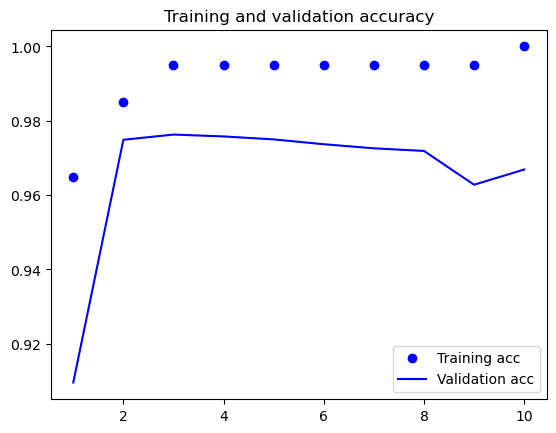

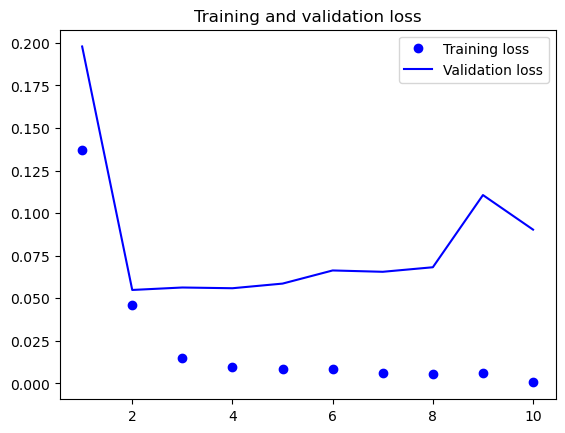

In [132]:
import matplotlib.pyplot as plt 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 
plt.show()